In [3]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots
from seaborn import load_dataset

# Load the penguins dataset
penguins = load_dataset("penguins").dropna(subset=["flipper_length_mm"])

# Define a function to add lines and rectangles
def add_annotations(fig, df, species):
    flipper_length = df["flipper_length_mm"]
    
    # Calculate statistics
    mean = flipper_length.mean()
    median = flipper_length.median()
    min_val = flipper_length.min()
    max_val = flipper_length.max()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)
    iqr = q3 - q1
    std = flipper_length.std()

    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color='green', width=2), annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=median, line=dict(color='red', width=2, dash="dash"), annotation_text="Median", annotation_position="top right")

    # Add rectangles for range, IQR, and ±2 std
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="blue", opacity=0.1, line_width=0, annotation_text="Range", annotation_position="top right")
    fig.add_vrect(x0=q1, x1=q3, fillcolor="orange", opacity=0.1, line_width=0, annotation_text="IQR", annotation_position="top right")
    fig.add_vrect(x0=mean-2*std, x1=mean+2*std, fillcolor="purple", opacity=0.1, line_width=0, annotation_text="±2 std", annotation_position="top right")
    
    return fig

# Create subplots for each species
species_list = penguins['species'].unique()
fig = make_subplots(rows=1, cols=len(species_list), subplot_titles=species_list)

# Add histograms and annotations for each species
for i, species in enumerate(species_list):
    species_df = penguins[penguins['species'] == species]
    hist = go.Histogram(x=species_df['flipper_length_mm'], name=species, nbinsx=20)
    
    fig.add_trace(hist, row=1, col=i+1)
    fig.update_xaxes(title_text="Flipper Length (mm)", row=1, col=i+1)
    fig.update_yaxes(title_text="Count", row=1, col=i+1)
    
    fig = add_annotations(fig, species_df, species)

# Update layout
fig.update_layout(title_text="Flipper Length Distribution for Each Penguin Species with Annotations",
                  showlegend=False, height=500, width=1200)

# Show the figure
fig.show()


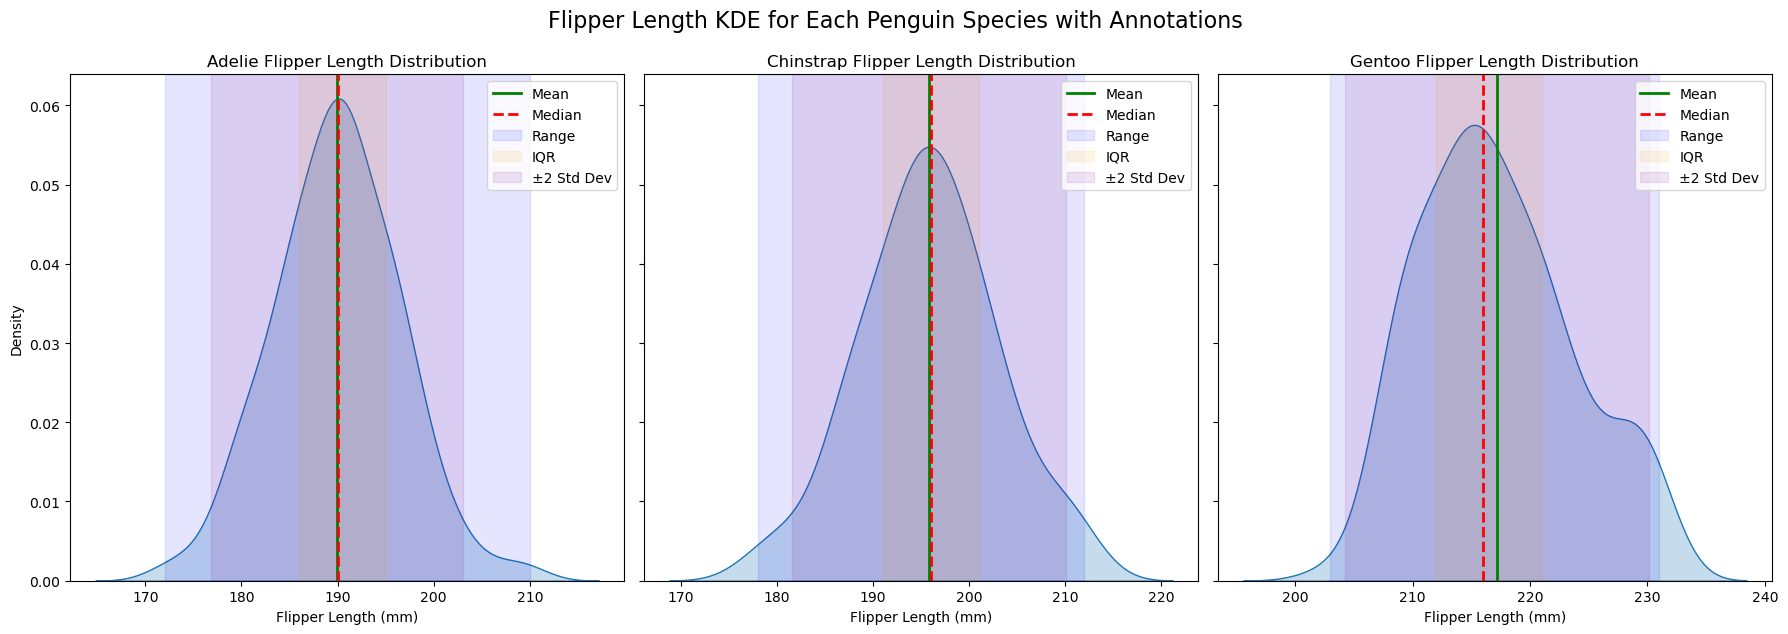

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from seaborn import load_dataset

# Load the penguins dataset
penguins = load_dataset("penguins").dropna(subset=["flipper_length_mm"])

# Define a function to plot KDE with annotations
def plot_kde_with_annotations(ax, df, species):
    flipper_length = df["flipper_length_mm"]
    
    # Calculate statistics
    mean = flipper_length.mean()
    median = flipper_length.median()
    min_val = flipper_length.min()
    max_val = flipper_length.max()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)
    iqr = q3 - q1
    std = flipper_length.std()

    # Plot KDE
    sns.kdeplot(flipper_length, ax=ax, fill=True, common_norm=False)
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color='green', linestyle='-', linewidth=2, label='Mean')
    ax.axvline(median, color='red', linestyle='--', linewidth=2, label='Median')
    
    # Add shaded regions for range, IQR, and ±2 std
    ax.axvspan(min_val, max_val, color='blue', alpha=0.1, label='Range')
    ax.axvspan(q1, q3, color='orange', alpha=0.1, label='IQR')
    ax.axvspan(mean - 2*std, mean + 2*std, color='purple', alpha=0.1, label='±2 Std Dev')

    # Set titles and labels
    ax.set_title(f'{species} Flipper Length Distribution')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')
    ax.legend(loc='upper right')

# Create subplots with 1 row and 3 columns
species_list = penguins['species'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot KDEs with annotations for each species
for ax, species in zip(axes, species_list):
    species_df = penguins[penguins['species'] == species]
    plot_kde_with_annotations(ax, species_df, species)

# Adjust layout
plt.tight_layout()
plt.suptitle('Flipper Length KDE for Each Penguin Species with Annotations', fontsize=16, y=1.05)
plt.show()


In [5]:
Histogram
Advantages:

Simple Interpretation: Easy to understand and interpret the distribution of data, showing where the majority of values lie and the overall shape of the distribution.
Detailed Information: Provides a good visual of the distribution, highlighting modes, skewness, and the presence of gaps in data.
Effective for Large Data Sets: Works well for large datasets to show overall trends.

    Disadvantages:

Bin Size Sensitivity: The appearance of the histogram can vary significantly depending on the choice of bin size and boundaries.
Not Smooth: The histogram provides a segmented view of the data distribution, which might not show the underlying smooth distribution.
Less Efficient for Small Data Sets: Can be misleading if the dataset is small or if the bins do not accurately reflect the underlying distribution.
    
    Box Plot
    Advantages:

Compact Summary: Provides a clear summary of data distribution with median, quartiles, and outliers.
Outlier Detection: Easily identifies outliers and gives a good sense of skewness.
Comparison Across Groups: Very useful for comparing distributions between different categories or groups.

    Disadvantages:

Lack of Distribution Shape Information: Does not show the actual distribution shape (e.g., bimodal or skewed distributions).
Less Intuitive for Some: Can be less intuitive to those unfamiliar with statistical summaries, such as quartiles and IQR.
No Frequency Information: Does not show how many data points lie in each quartile, only the spread.

    KDE
    Advantages:

Smooth Representation: Shows the underlying distribution of data in a smooth and continuous manner, making it easier to identify patterns like multimodality.
Insight into Shape: Allows for a detailed view of the data’s distribution shape, providing more information about the data compared to a box plot.
Comparative Visualization: Multiple KDE plots can be overlaid to compare distributions across groups effectively.
Disadvantages:

Choice of Bandwidth: The appearance of the KDE plot can vary greatly with different bandwidth parameters, which may result in over-smoothing or under-smoothing of the distribution.
Requires Larger Sample Size: May not perform well with small datasets as it can produce misleading smooth curves.
Less Intuitive for Some: People unfamiliar with probability density functions might find KDE plots harder to interpret compared to histograms or box plots.
    Chatbot history：https://chatgpt.com/c/66f5a451-aba8-8012-8c3f-6feb9825faf0

SyntaxError: invalid character '’' (U+2019) (2187004606.py, line 31)

In [6]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [7]:
1.Datasets B and D: Both datasets have distributions centered around the middle (approximately 5), and their histogram shapes are similar, 
    indicating that their means and variances are similar.
2.Datasets B and C: Both datasets have means around 5, but dataset C has a more spread-out distribution with two peaks (bimodal distribution), indicating a larger variance,
    while dataset B has a more concentrated distribution with a smaller variance.
3.Datasets C and D: Both datasets have relatively concentrated distributions, suggesting similar variances, but dataset C has two distribution centers (one close to 0 and the other close to 10),
    while dataset D has its distribution center around 5, showing a significant difference in means.
4. Datasets A and C: Dataset A has a mean around the middle (approximately 5) with a uniform distribution, 
    while dataset C has two distinct distribution centers (one close to 0 and the other close to 10) with a highly concentrated distribution. This indicates that both the means and variances are quite different between these two datasets.


SyntaxError: invalid decimal literal (453667692.py, line 1)

In [8]:
In a right skewness, the mean is larger than the median because most of the data is concentrating in the left side.
To the contrary,in a left skewness, the mean is smaller than the median because most of the data is concentrating in the right side.

SyntaxError: invalid syntax (2433865205.py, line 1)

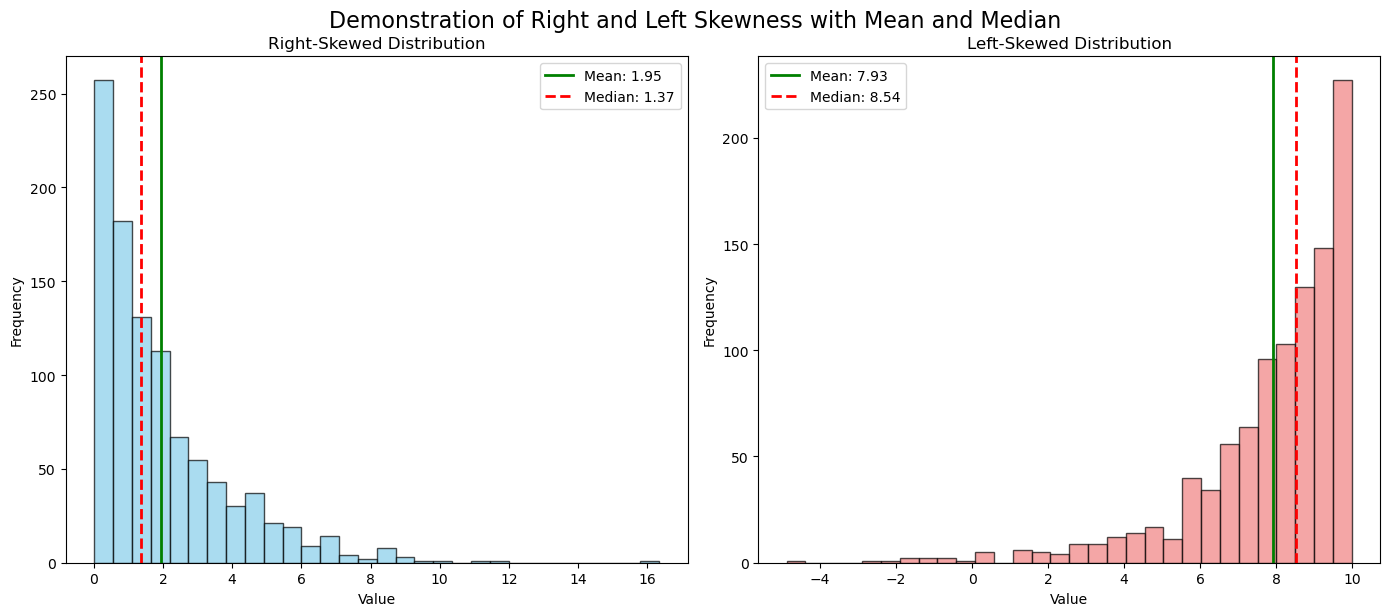

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
# Right-skewed data (positive skew)
right_skewed_data = np.random.exponential(scale=2, size=1000)

# Left-skewed data (negative skew)
left_skewed_data = -np.random.exponential(scale=2, size=1000) + 10

# Calculate mean and median for both datasets
right_mean = right_skewed_data.mean()
right_median = np.median(right_skewed_data)

left_mean = left_skewed_data.mean()
left_median = np.median(left_skewed_data)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot right-skewed data
axes[0].hist(right_skewed_data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
axes[0].axvline(right_mean, color='green', linestyle='-', linewidth=2, label=f'Mean: {right_mean:.2f}')
axes[0].axvline(right_median, color='red', linestyle='--', linewidth=2, label=f'Median: {right_median:.2f}')
axes[0].set_title('Right-Skewed Distribution')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot left-skewed data
axes[1].hist(left_skewed_data, bins=30, color='lightcoral', alpha=0.7, edgecolor='black')
axes[1].axvline(left_mean, color='green', linestyle='-', linewidth=2, label=f'Mean: {left_mean:.2f}')
axes[1].axvline(left_median, color='red', linestyle='--', linewidth=2, label=f'Median: {left_median:.2f}')
axes[1].set_title('Left-Skewed Distribution')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.suptitle('Demonstration of Right and Left Skewness with Mean and Median', fontsize=16, y=1.02)
plt.show()


In [11]:
import pandas as pd

# Corrected URL to the raw CSV file on GitHub
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-05/Merged%20Costs%20(1.0)%20-%20Sheet1.csv'

# Reading the CSV file into a DataFrame
df = pd.read_csv(url)

# Display the first few rows and columns of the DataFrame
df.head()


,e,Country,City,Line,Start year,End year,RR?,Length,TunnelPer,Tunnel,Stations,Source1,Cost,Currency,Year,PPP rate,Real cost,Cost/km (Millions),Source2,Reference
0,7136.0,CA,Vancouver,Broadway,2020,2025,0.0,5.7,87.72%,5.0,6,Plan,"2,830",CAD,2018.0,0.84,2377.2,417.052632,Media,https://www.translink.ca/Plans-and-Projects/Ra...
1,7137.0,CA,Toronto,Vaughan,2009,2017,0.0,8.6,100.00%,8.6,6,Media,"3,200",CAD,2013.0,0.81,2592,301.395349,Media,https://www.thestar.com/news/gta/transportatio...
2,7138.0,CA,Toronto,Scarborough,2020,2030,0.0,7.8,100.00%,7.8,3,Wiki,"5,500",CAD,2018.0,0.84,4620,592.307692,Media,https://urbantoronto.ca/news/2020/03/metrolinx...
3,7139.0,CA,Toronto,Ontario,2020,2030,0.0,15.5,57.00%,8.8,15,Plan,"8,573",CAD,2019.0,0.84,7201.32,464.601290,Plan,https://metrolinx.files.wordpress.com/2019/07/...
4,7144.0,CA,Toronto,Yonge to Richmond Hill,2020,2030,0.0,7.4,100.00%,7.4,6,Plan,"5,600",CAD,2020.0,0.84,4704,635.675676,Media,https://www.thestar.com/news/gta/2020/06/24/me...


In [12]:
import plotly.express as px
import pandas as pd


df = px.data.gapminder()


fig = px.scatter(df, 
                 x='gdpPercap', 
                 y='lifeExp', 
                 size='pop', 
                 color='continent', 
                 hover_name='country',
                 animation_frame='year', 
                 animation_group='country',
                 log_x=True, 
                 size_max=60,
                 range_y=[25,90])

fig.show()

data = {
    'percent_change': [0.001, 0.002, 0.003, -0.001, 0.004, 0.005] * 10,
    'rank': [1, 2, 3, 4, 5, 6] * 10,
    'percent': [10, 20, 30, 40, 50, 60] * 10,
    'sex': ['male', 'female', 'male', 'female', 'male', 'female'] * 10,
    'year': [2000, 2001, 2002, 2003, 2004, 2005] * 10,
    'name': ['A', 'B', 'C', 'D', 'E', 'F'] * 10
}

df_custom = pd.DataFrame(data)


fig_custom = px.scatter(df_custom, 
                        x='percent_change', 
                        y='rank', 
                        size='percent', 
                        color='sex', 
                        animation_frame='year', 
                        animation_group='name', 
                        hover_name='name',
                        size_max=50, 
                        range_x=[-0.005, 0.005]) # 删除 log_x=True 和 range_y 参数

fig_custom.show()



In [13]:
I've reviewed the course wiki-textbook and interacted with a ChatBot .

SyntaxError: unterminated string literal (detected at line 1) (1010004525.py, line 1)

In [ ]:
chatbot history:https://chatgpt.com/c/66f5a451-aba8-8012-8c3f-6feb9825faf0